In [103]:
# Procedure to calculate the dry deposition velocity (m/s), based on the Hoppel et al. (2005) procedure, using a weather database (timestamp, temperature, relative humidity and windspeed)

# Version 19  (last updated: 04/12/2020)

# Updates: focused on selected bins, Weather data from B&B (2017) and improvement of calculation's description.
# Testing the bin edges

# References:
# W.A. Hoppel, P.F. Caffrey, G.M. Frick, Particle deposition on water: Surface source versus upwind source, 
# J. Geophys. Res. D Atmos. 110 (2005) 1–15. doi:10.1029/2004JD005148.

In [104]:
# Create a working folder and enter in it

In [105]:
# 1. Check which is the folder you are on using "pwd"

In [106]:
pwd

'C:\\Users\\Nuno Canha\\Desktop\\Python\\Dry deposition\\Official analysis\\Improvements\\2017 - B&B&OPC\\Step 1 - Calculation of DDV'

In [107]:
#2. If you are not in your working folder, enter in it using the command "cd"

In [108]:
cd C:\Users\Nuno Canha\Desktop\Python\Dry deposition\Official analysis\Improvements\2017 - B&B&OPC\Step 1 - Calculation of DDV

C:\Users\Nuno Canha\Desktop\Python\Dry deposition\Official analysis\Improvements\2017 - B&B&OPC\Step 1 - Calculation of DDV


In [109]:
# Your raw data file should be "csv" type.

In [110]:
# Upload the analysis packages

In [111]:
import pandas as pd
import numpy as np

In [112]:
import matplotlib.pyplot as plt
from datetime import datetime

In [113]:
# Basic x-y plot
# this command is for the graphs to appear in the notebook
%matplotlib inline

In [114]:
# Loading the data
name = input('Which weather station is being analised?')

Which weather station is being analised? B&B 2017


In [115]:
data = pd.read_csv("BB_Hourly_correct.csv", delimiter=";", na_values=['-999.0'])

# No values (-999.0) were replaced by NaN in order to not interfere with the analysis
data.drop(data.columns[[5,6]], axis =1, inplace=True)
data


,Unnamed: 0,T - BB,RH - BB,WS - BB,WD - BB
0,NaN,mean,mean,mean,mean
1,Date,NaN,NaN,NaN,NaN
2,03/06/2017 02:00,-3.635,74.6,6.24,141.0333333
3,03/06/2017 03:00,-4.171666667,73.66833333,6.263333333,138.95
4,03/06/2017 04:00,-4.255,71.785,6.56,138.05
...,...,...,...,...,...
621,28/06/2017 21:00,1.34,84.135,3.091666667,137.3166667
622,28/06/2017 22:00,1.051666667,84.58166667,3.213333333,137.7833333
623,28/06/2017 23:00,0.503333333,84.87333333,3.06,133.5833333
624,29/06/2017 00:00,-0.116666667,85.10833333,3.141666667,130.4


In [116]:
data1=data.drop(data.index[[0,1]])
data1.rename(columns={'Unnamed: 0':'Date'},inplace=True)

data1['Date'] = pd.to_datetime(data1.Date, format='%d/%m/%Y %H:%M')
# Set the timestamp as index:
data1 = data1.set_index('Date')
data1


,T - BB,RH - BB,WS - BB,WD - BB
Date,,,,
2017-06-03 02:00:00,-3.635,74.6,6.24,141.0333333
2017-06-03 03:00:00,-4.171666667,73.66833333,6.263333333,138.95
2017-06-03 04:00:00,-4.255,71.785,6.56,138.05
2017-06-03 05:00:00,-4.631666667,71.085,6.836666667,134.3
2017-06-03 06:00:00,-4.343333333,68.985,7.131666667,138.65
...,...,...,...,...
2017-06-28 21:00:00,1.34,84.135,3.091666667,137.3166667
2017-06-28 22:00:00,1.051666667,84.58166667,3.213333333,137.7833333
2017-06-28 23:00:00,0.503333333,84.87333333,3.06,133.5833333


In [117]:
# NOT NECESSARY
# Create a column for the timestamp in a new dataset data1 (with only 4 columns: timestamp, T (air temperature, ºC), RH (relative humidity, %), WS (wind speed, m/s))

In [118]:
# To rename the columns' names to simplify the code writting 
# new_names={'Year':'year','MonthOfYear':'month','DayOfMonth': 'day', 'HourOfDay(UTC)': 'hours', 'AirTemperature(C)':'T','RelativeHumidity(%)':'RH','WindSpeed(m/s)':'WS'}
# data = data.rename(columns=new_names)
# data.head()

In [119]:
# Print data types within the Pandas dataframe
data.dtypes

Unnamed: 0    object
T - BB        object
RH - BB       object
WS - BB       object
WD - BB       object
dtype: object

In [120]:
# Create a new dataset ("data1") with a timestamp and the selected parameters

# data['Date']=pd.to_datetime(data[['year','month','day','hours']])
# data1 = data[['Date']].join(data[['T']].join(data[['RH']].join(data[['WS']])))
# data1.head()
# data1.tail()

In [121]:
# Check the data format:
data1.dtypes

T - BB     object
RH - BB    object
WS - BB    object
WD - BB    object
dtype: object

In [122]:
# Check the format of "Date":
data2=data1.reset_index()
data2.dtypes

Date       datetime64[ns]
T - BB             object
RH - BB            object
WS - BB            object
WD - BB            object
dtype: object

In [123]:
# Convert the "Date" format to datetime format:
data2['Date'] = data2['Date'].astype('datetime64')
data2.dtypes



Date       datetime64[ns]
T - BB             object
RH - BB            object
WS - BB            object
WD - BB            object
dtype: object

In [124]:
# To select the time period of interest:
# Example: from 30/05 – 02/07/2017

data2=data2[(data2['Date'] > '2017-05-30 00:00:00') & (data2['Date'] < '2017-07-02 23:00:00')]
data2

,Date,T - BB,RH - BB,WS - BB,WD - BB
0,2017-06-03 02:00:00,-3.635,74.6,6.24,141.0333333
1,2017-06-03 03:00:00,-4.171666667,73.66833333,6.263333333,138.95
2,2017-06-03 04:00:00,-4.255,71.785,6.56,138.05
3,2017-06-03 05:00:00,-4.631666667,71.085,6.836666667,134.3
4,2017-06-03 06:00:00,-4.343333333,68.985,7.131666667,138.65
...,...,...,...,...,...
619,2017-06-28 21:00:00,1.34,84.135,3.091666667,137.3166667
620,2017-06-28 22:00:00,1.051666667,84.58166667,3.213333333,137.7833333
621,2017-06-28 23:00:00,0.503333333,84.87333333,3.06,133.5833333
622,2017-06-29 00:00:00,-0.116666667,85.10833333,3.141666667,130.4


In [125]:
data3=data2
data3 = data3.set_index('Date')

# Convert the type of data (before: object; after: float)
data3['T - BB'] = data3['T - BB'].astype(float)
data3['RH - BB'] = data3['RH - BB'].astype(float)
data3['WS - BB'] = data3['WS - BB'].astype(float)
data3['WD - BB'] = data3['WD - BB'].astype(float)
data3.dtypes

T - BB     float64
RH - BB    float64
WS - BB    float64
WD - BB    float64
dtype: object

In [126]:
neg2=data3[['WS - BB']].agg(lambda x: sum(x < 1)).sum()
neg2

total=len(data3['WS - BB'])
pneg = neg2/total*100
print("The percentage of wind speed values below 1 m/s is", pneg.round(0).astype(int), "%." )

The percentage of wind speed values below 1 m/s is 1 %.


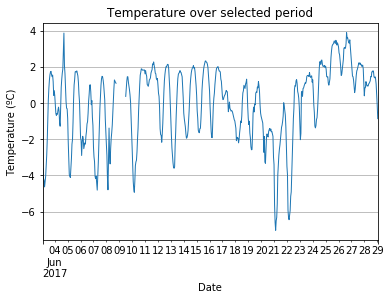

In [127]:
# Rename the collumns name:
data3=data3.rename(columns = {'T - BB':'T','RH - BB':'RH','WS - BB':'WS','WD - BB':'WD' })

# Add columns with year, month, and weekday name

data3['Year'] = data3.index.year
data3['Month'] = data3.index.month
data3['Day'] = data3.index.day
data3['Hour'] = data3.index.hour

data3

# Plot of the time series of Temperature data:

fig1 = data3['T'].plot(linewidth=1, title ='Temperature over selected period');
fig1.set_xlabel('Date')
fig1.set_ylabel('Temperature (ºC)')
fig1.grid(True)

# To save the figure
plt.savefig('Fig1 - Temperature over selected period @ '+ name)

# Bigger figure
plt.rcParams['figure.figsize'] = [18, 9]

# Remark: how to costumize graphs: https://matplotlib.org/tutorials/introductory/customizing.html

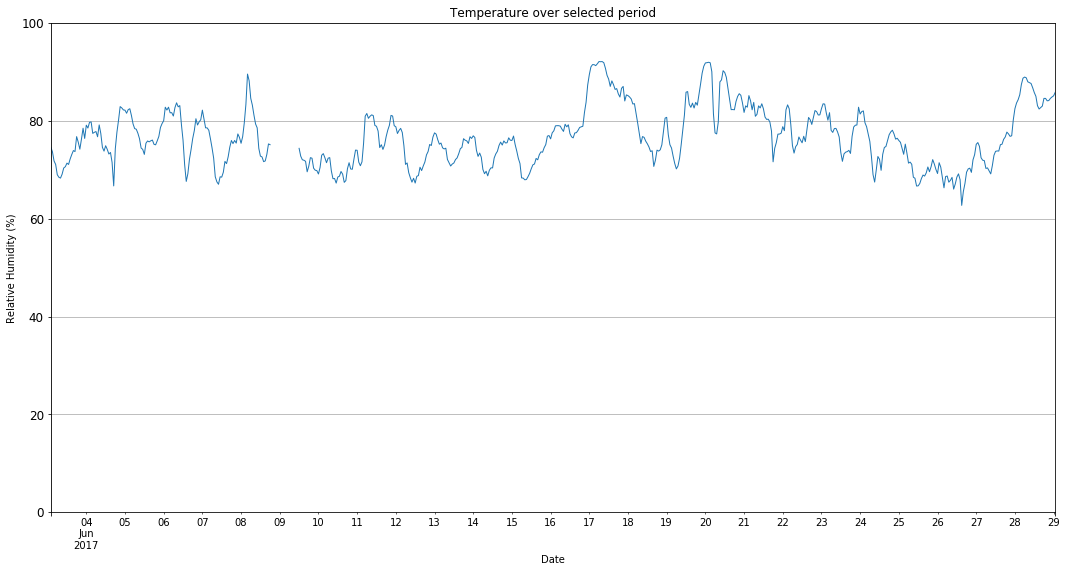

In [128]:
# Plot of the time series of Relative Humidity data:

fig2 = data3['RH'].plot(linewidth=1, title ='Temperature over selected period');
fig2.set_xlabel('Date')
fig2.set_ylabel('Relative Humidity (%)')
fig2.tick_params(axis='x', labelsize=12 )
fig2.tick_params(axis='y', labelsize=12 )
fig2.set_ylim(0,100)
fig2.grid(True)

# To save the figure
plt.savefig('Fig2 - Relative Humidity over selected period @ '+ name)

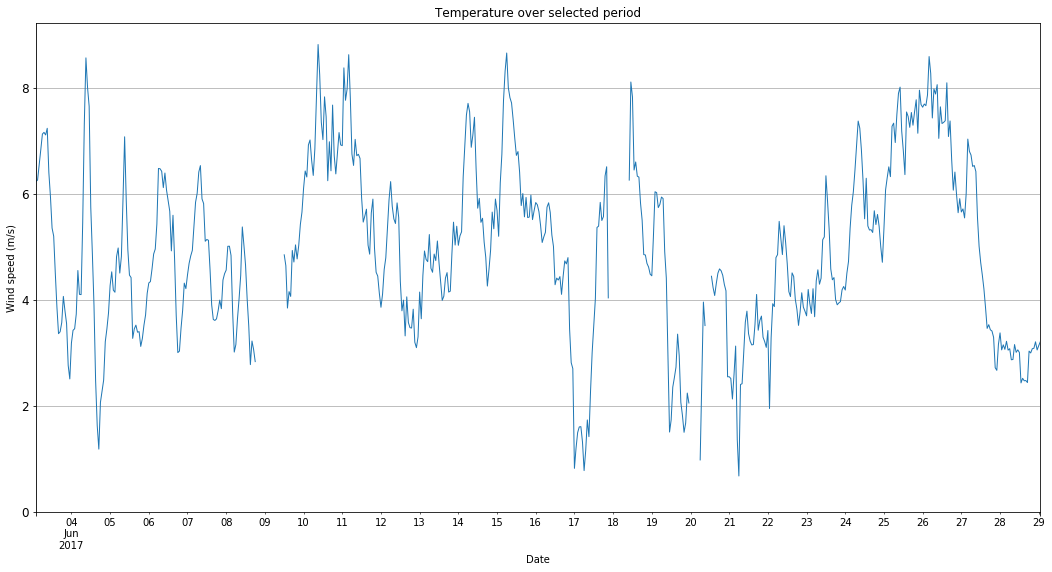

In [129]:
# Plot of the time series of Relative Humidity data:

fig3 = data3['WS'].plot(linewidth=1,title ='Temperature over selected period');
fig3.set_xlabel('Date')
fig3.set_ylabel('Wind speed (m/s)')
fig3.tick_params(axis='x', labelsize=12 )
fig3.tick_params(axis='y', labelsize=12 )
fig3.set_ylim(0,)
fig3.grid(True)

# To save the figure
plt.savefig('Fig3 - Wind speed over selected period @ '+ name)

#### 

In [130]:
# How to create a single figure with several graphs:

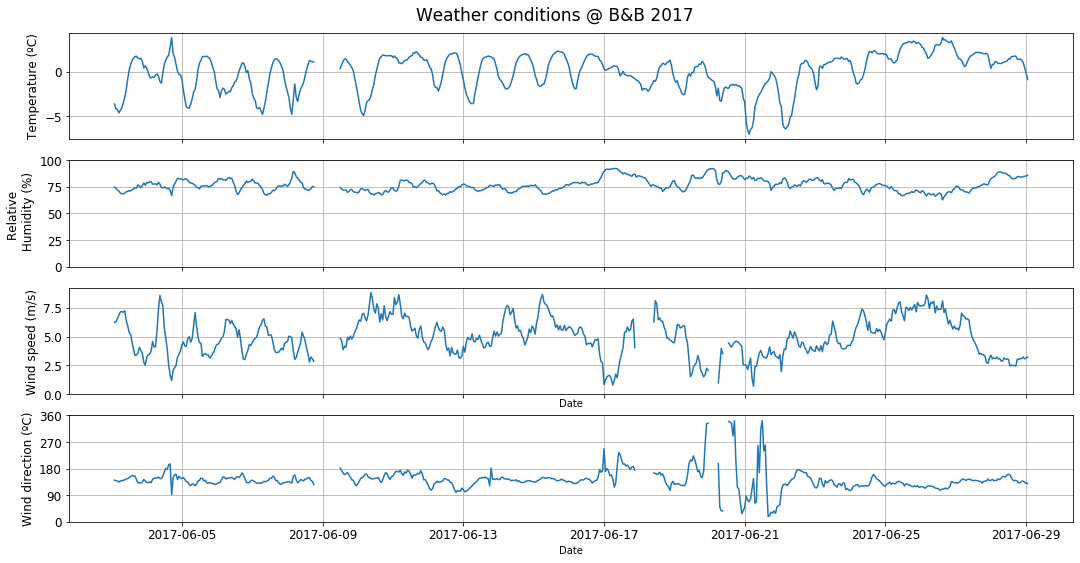

In [131]:
fig4, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)

fig4.suptitle('Weather conditions @ ' + name, y=0.92,fontsize=17)
ax1.plot(data3['T'])
ax1.set_ylabel('Temperature (ºC)', fontsize=12)
ax1.tick_params(axis='x', labelsize=12 )
ax1.tick_params(axis='y', labelsize=12 )
ax1.grid(True)

ax2.plot(data3['RH'])
ax2.set_ylabel('Relative \n Humidity (%)', fontsize=12)
ax2.tick_params(axis='x', labelsize=12 )
ax2.tick_params(axis='y', labelsize=12 )
ax2.set_ylim(0,100)
ax2.grid(True)

ax3.plot(data3['WS'])
ax3.set_ylabel('Wind speed (m/s)', fontsize=12)
ax3.tick_params(axis='x', labelsize=12 )
ax3.tick_params(axis='y', labelsize=12 )
ax3.set_xlabel('Date')
ax3.set_ylim(0,)
ax3.grid(True)

ax4.plot(data3['WD'])
ax4.set_ylabel('Wind direction (ºC)', fontsize=12)
ax4.tick_params(axis='x', labelsize=12 )
ax4.tick_params(axis='y', labelsize=12 )
ax4.set_xlabel('Date')
ax4.set_ylim(0,360)
plt.yticks(np.arange(0,361,90))
ax4.grid(True)


# To save the figure
plt.savefig('Fig4 - Weather conditions @ ' + name)

In [132]:
# function calculates the particle deposition for a certin particle size at
# a named wind speed using the Hoppel 2005 function for particle depostion
# for a uniform surface source in equilibrium (equation 7).
# vd = vg(delta/vref)^(-vg/X)

# INPUTS: ustar = friction velocity 
#         r = particle diameter
# OUTPUTS : vd in ms-1

# REFERENCE: 
# Hoppel W.A. (2005) Particle deposition on water: Surface source versus upwind source. 
# JOURNAL OF GEOPHYSICAL RESEARCH, VOL. 110, D10206. DOI:10.1029/2004JD005148   

# Calculation of friction velocity (ustar) (based on wind speed) following the equation by Zou et al. (2017) for onshore winds
# REFERENCE:
# Z. Zou, D. Zhao, B. Liu, J.A. Zhang, J. Huang, Observation-based parameterization of air-sea fluxes in terms of wind speed and atmospheric stability under low-to-moderate wind conditions, 
# J. Geophys. Res. Ocean. 122 (2017) 4123–4142. DOI:10.1002/2016JC012399

data3['ustar']= 0.0015*(data3['WS']**2)+0.0099*data3['WS']+0.062
data3
    

,T,RH,WS,WD,Year,Month,Day,Hour,ustar
Date,,,,,,,,,
2017-06-03 02:00:00,-3.635000,74.600000,6.240000,141.033333,2017,6,3,2,0.182182
2017-06-03 03:00:00,-4.171667,73.668333,6.263333,138.950000,2017,6,3,3,0.182851
2017-06-03 04:00:00,-4.255000,71.785000,6.560000,138.050000,2017,6,3,4,0.191494
2017-06-03 05:00:00,-4.631667,71.085000,6.836667,134.300000,2017,6,3,5,0.199793
2017-06-03 06:00:00,-4.343333,68.985000,7.131667,138.650000,2017,6,3,6,0.208895
...,...,...,...,...,...,...,...,...,...
2017-06-28 21:00:00,1.340000,84.135000,3.091667,137.316667,2017,6,28,21,0.106945
2017-06-28 22:00:00,1.051667,84.581667,3.213333,137.783333,2017,6,28,22,0.109300
2017-06-28 23:00:00,0.503333,84.873333,3.060000,133.583333,2017,6,28,23,0.106339


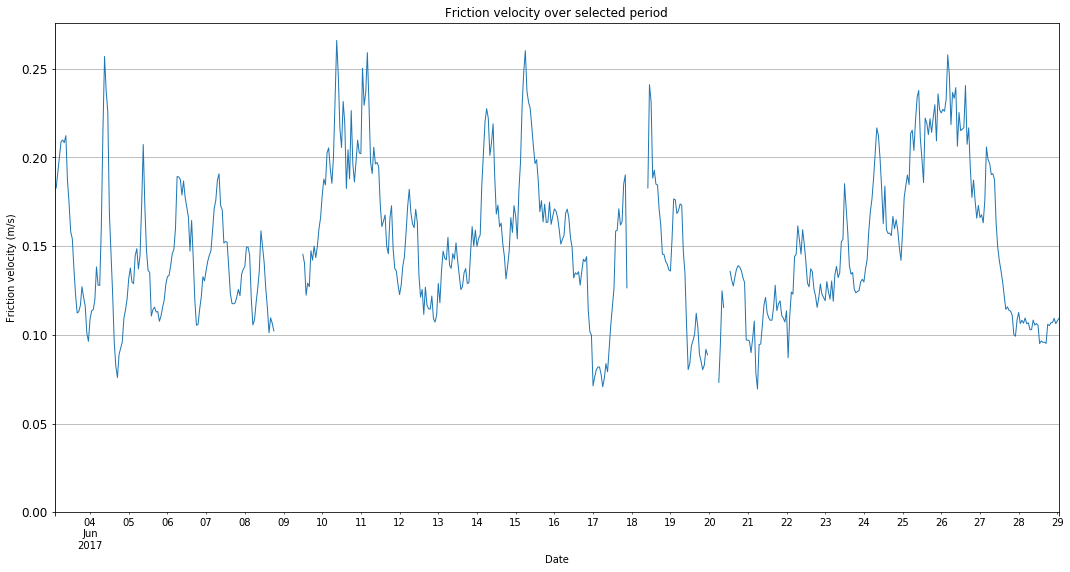

In [133]:
# Plot of the friction velocity data:

fig5 = data3['ustar'].plot(linewidth=1,title ='Friction velocity over selected period');
fig5.set_xlabel('Date')
fig5.set_ylabel('Friction velocity (m/s)')
fig5.tick_params(axis='x', labelsize=12 )
fig5.tick_params(axis='y', labelsize=12 )
fig5.set_ylim(0,)
fig5.grid(True)

# To save the figure
plt.savefig('Fig5 - Friction velocity over selected period @ '+ name)

In [134]:
data3.dtypes

T        float64
RH       float64
WS       float64
WD       float64
Year       int64
Month      int64
Day        int64
Hour       int64
ustar    float64
dtype: object

In [135]:
# Definition of function to calculate the kinematic viscosity of air (viscair or va, in m2/s, for air temperatures between -173 and 227 ºC) 
# as a function of air temperature T (in ºC), following the equation of Andreas, 1989 [3] (equation 78, page 31):

# va(T)=1.326 × (10^-5) (1 + 6.542 × (10^-3) × T) + 8.301 × (10^-6) × T^2) -4.840 × ( 10^-9) × T^3 )  


def viscair(T):
    """
    Function to calculate the kinematic viscosity (in m2/s)
    Parameters
    -------
    : int | float
        Input air temperature in celsius (should be a number)
    Returns
    -------
    kinematic viscosity (in m2/s) (float)
    """
    
    # Convert the Fahrenheit into Celsius and return it
    viscair_result = 1.326e-5*(1 + 6.542e-3*T + 8.301e-6*T**2 - 4.84e-9*T**3)
    return viscair_result

In [136]:
viscair(10)

1.4138412147600002e-05

In [137]:
data3['viscair'] = viscair(data3['T'])

In [138]:
data3

,T,RH,WS,WD,Year,Month,Day,Hour,ustar,viscair
Date,,,,,,,,,,
2017-06-03 02:00:00,-3.635000,74.600000,6.240000,141.033333,2017,6,3,2,0.182182,0.000013
2017-06-03 03:00:00,-4.171667,73.668333,6.263333,138.950000,2017,6,3,3,0.182851,0.000013
2017-06-03 04:00:00,-4.255000,71.785000,6.560000,138.050000,2017,6,3,4,0.191494,0.000013
2017-06-03 05:00:00,-4.631667,71.085000,6.836667,134.300000,2017,6,3,5,0.199793,0.000013
2017-06-03 06:00:00,-4.343333,68.985000,7.131667,138.650000,2017,6,3,6,0.208895,0.000013
...,...,...,...,...,...,...,...,...,...,...
2017-06-28 21:00:00,1.340000,84.135000,3.091667,137.316667,2017,6,28,21,0.106945,0.000013
2017-06-28 22:00:00,1.051667,84.581667,3.213333,137.783333,2017,6,28,22,0.109300,0.000013
2017-06-28 23:00:00,0.503333,84.873333,3.060000,133.583333,2017,6,28,23,0.106339,0.000013


In [139]:
# Constants used in the calculation of the dry deposition velocity (m/s)

In [140]:
g = 9.81            # Gravity (m/s2)
pden = 2500      # Particle density for dust particles (kg/m-3)


In [141]:
# Remark: 

# For particles with diameter below 1 µm, C (Cunningham slip correction) should be calculated as follows:

# C  =1 + (6.21×10^(-4) * T)/dp, where dp is the particle diameter (in µm) and T is the air temperature (in Kelvin). 

# Reference:
# Chapter 4 - ENVIRONMENTAL PROTECTION AGENCY Student Manual, in: APTI 4 1 3 CONTROL OF PARTICULATE MATTER EMISSIONS, 5TH EDITION, n.d. 
# https://www.apti-learn.net/lms/register/display_document.aspx?dID=261


In [142]:
# step 1: calculate the particle gravitational settling velocity, vg. 

def vg(D, T, viscair):
    """
    Function to calculate vg
    Parameters
    : input:
        D - diameter in micrometers
        T - air temperature (in Kelvins)
        viscair - kinematic viscosity
        
    Returns
    vg (in m/s)
    """
    if D >= 1: 
        C = 1
        vg_result = (g*pden*((D*10**-6)**2)*C)/(18*viscair)
    elif D<1:
        C = 1 + ((6.21e-4)*(273.15+T))/D
        vg_result = (g*pden*((D*10**-6)**2)*C)/(18*viscair)
    return vg_result


In [143]:
data3['vg_10'] = vg(10,data3['T'],data3['viscair'])

In [144]:
# step 2: calculate the X parameter

beta = 1 # Unitiy constant (Hoppel 2002)
k = 0.4 # Von karmen constant

# The X parameter is defined by the following equation (described by Hoppel (2002) in the following equation: X = beta x k x u*
# where u* is the friction velocity (m/s), as calculated previously.

# Reference:
# W.A. Hoppel, G.M. Frick, J.W. Fitzgerald, Surface source function for sea-salt aerosol and aerosol dry deposition to the ocean surface, 
# J. Geophys. Res. Atmos. 107 (2002) AAC 7-1-AAC 7-17. doi:10.1029/2001JD002014.

def X(ustar):
        """
    Function to X parameter
    Parameters
    : input:
        ustar - Friction velocity speed (m/s)
        
    Returns
    X
    """
        X_result = k*beta*ustar
        return X_result

In [145]:
data3['X_parameter'] = X(data3['ustar'])

In [146]:
data3

,T,RH,WS,WD,Year,Month,Day,Hour,ustar,viscair,vg_10,X_parameter
Date,,,,,,,,,,,,
2017-06-03 02:00:00,-3.635000,74.600000,6.240000,141.033333,2017,6,3,2,0.182182,0.000013,0.010524,0.072873
2017-06-03 03:00:00,-4.171667,73.668333,6.263333,138.950000,2017,6,3,3,0.182851,0.000013,0.010562,0.073140
2017-06-03 04:00:00,-4.255000,71.785000,6.560000,138.050000,2017,6,3,4,0.191494,0.000013,0.010568,0.076598
2017-06-03 05:00:00,-4.631667,71.085000,6.836667,134.300000,2017,6,3,5,0.199793,0.000013,0.010594,0.079917
2017-06-03 06:00:00,-4.343333,68.985000,7.131667,138.650000,2017,6,3,6,0.208895,0.000013,0.010574,0.083558
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 21:00:00,1.340000,84.135000,3.091667,137.316667,2017,6,28,21,0.106945,0.000013,0.010186,0.042778
2017-06-28 22:00:00,1.051667,84.581667,3.213333,137.783333,2017,6,28,22,0.109300,0.000013,0.010205,0.043720
2017-06-28 23:00:00,0.503333,84.873333,3.060000,133.583333,2017,6,28,23,0.106339,0.000013,0.010242,0.042536


In [147]:
# step 3: Calculate the depostition velocity, vd (in ms-1), using Equation 7 of Hoppel et al. (2005):

delta = 0.01 # Particle injection height, m. 
zref = 2 # Measurement height, specifically 2 m for B&B campaign (measurement heigth of weather parameters by weather stations - B&B, PROMICE and S6)

# REFERENCE: 
# Hoppel W.A. (2005) Particle deposition on water: Surface source versus upwind source. 
# JOURNAL OF GEOPHYSICAL RESEARCH, VOL. 110, D10206. DOI:10.1029/2004JD005148   

def vd(vg, X_parameter):
    vd_result = vg*((delta/zref)**(-vg/X_parameter))
    return vd_result

In [148]:
data3['vd_10'] = vd(data3['vg_10'],data3['X_parameter'])

In [149]:
data3

,T,RH,WS,WD,Year,Month,Day,Hour,ustar,viscair,vg_10,X_parameter,vd_10
Date,,,,,,,,,,,,,
2017-06-03 02:00:00,-3.635000,74.600000,6.240000,141.033333,2017,6,3,2,0.182182,0.000013,0.010524,0.072873,0.022621
2017-06-03 03:00:00,-4.171667,73.668333,6.263333,138.950000,2017,6,3,3,0.182851,0.000013,0.010562,0.073140,0.022700
2017-06-03 04:00:00,-4.255000,71.785000,6.560000,138.050000,2017,6,3,4,0.191494,0.000013,0.010568,0.076598,0.021951
2017-06-03 05:00:00,-4.631667,71.085000,6.836667,134.300000,2017,6,3,5,0.199793,0.000013,0.010594,0.079917,0.021385
2017-06-03 06:00:00,-4.343333,68.985000,7.131667,138.650000,2017,6,3,6,0.208895,0.000013,0.010574,0.083558,0.020674
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 21:00:00,1.340000,84.135000,3.091667,137.316667,2017,6,28,21,0.106945,0.000013,0.010186,0.042778,0.035966
2017-06-28 22:00:00,1.051667,84.581667,3.213333,137.783333,2017,6,28,22,0.109300,0.000013,0.010205,0.043720,0.035149
2017-06-28 23:00:00,0.503333,84.873333,3.060000,133.583333,2017,6,28,23,0.106339,0.000013,0.010242,0.042536,0.036677


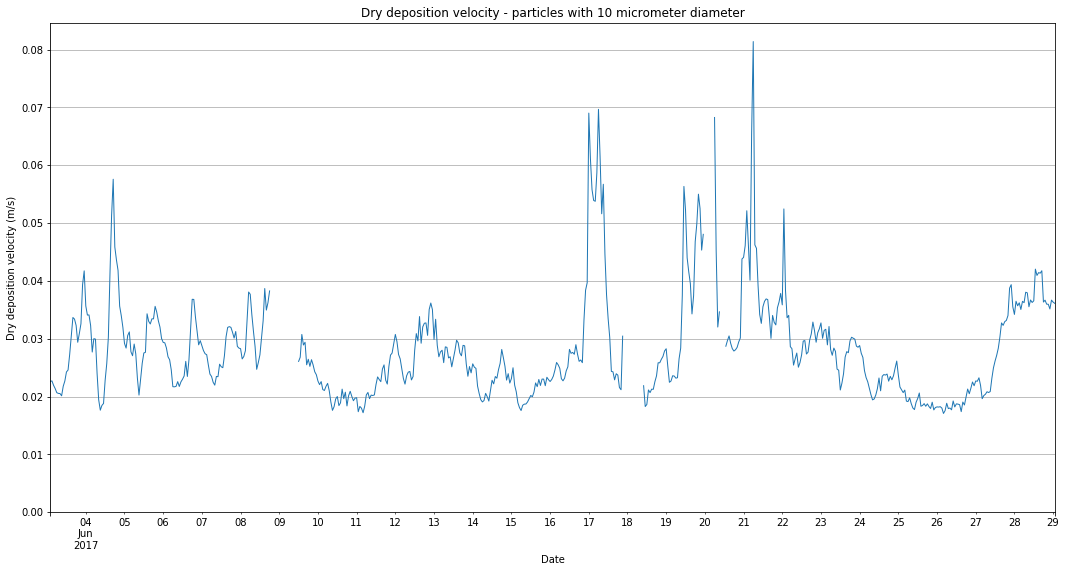

In [150]:
# Plot of the time series of Relative Humidity data:

fig6 = data3['vd_10'].plot(linewidth=1,title ='Dry deposition velocity - particles with 10 micrometer diameter');
fig6.set_xlabel('Date')
fig6.set_ylabel('Dry deposition velocity (m/s)')
fig6.set_ylim(0,)
fig6.tick_params(axis='x', labelsize=16)
fig6.grid(True)

# To save the figure
plt.savefig('Fig6 - Dry deposition velocity of Particles diameter of 10 micrometers @ '+ name)

In [151]:
# Descriptive statistics
data3.describe()

,T,RH,WS,WD,Year,Month,Day,Hour,ustar,viscair,vg_10,X_parameter,vd_10
count,607.000000,607.000000,586.000000,586.000000,624.0,624.0,624.000000,624.00000,586.000000,6.070000e+02,607.000000,586.000000,586.000000
mean,-0.004607,76.766345,4.931886,142.098732,2017.0,6.0,15.583333,11.50000,0.151396,1.326008e-05,0.010277,0.060558,0.028207
std,2.078894,5.943354,1.651696,36.834358,0.0,0.0,7.511112,6.92774,0.041220,1.799600e-07,0.000141,0.016488,0.008910
min,-7.031667,62.715000,0.683333,18.066667,2017.0,6.0,3.000000,0.00000,0.069465,1.265549e-05,0.010019,0.027786,0.017074
25%,-1.398333,72.190833,3.750417,129.083333,2017.0,6.0,9.000000,5.75000,0.120228,1.313891e-05,0.010173,0.048091,0.022153
50%,0.576667,76.060000,4.846667,139.658333,2017.0,6.0,16.000000,11.50000,0.145217,1.331006e-05,0.010237,0.058087,0.026512
75%,1.540000,80.935833,6.073333,149.970833,2017.0,6.0,22.000000,17.25000,0.177454,1.339385e-05,0.010370,0.070982,0.032022
max,3.896667,92.113333,8.820000,342.466667,2017.0,6.0,29.000000,23.00000,0.266007,1.359969e-05,0.010766,0.106403,0.081389


In [152]:
data3['vg_25'] = vg(2.5,data3['T'],data3['viscair'])

In [153]:
data3

,T,RH,WS,WD,Year,Month,Day,Hour,ustar,viscair,vg_10,X_parameter,vd_10,vg_25
Date,,,,,,,,,,,,,,
2017-06-03 02:00:00,-3.635000,74.600000,6.240000,141.033333,2017,6,3,2,0.182182,0.000013,0.010524,0.072873,0.022621,0.000658
2017-06-03 03:00:00,-4.171667,73.668333,6.263333,138.950000,2017,6,3,3,0.182851,0.000013,0.010562,0.073140,0.022700,0.000660
2017-06-03 04:00:00,-4.255000,71.785000,6.560000,138.050000,2017,6,3,4,0.191494,0.000013,0.010568,0.076598,0.021951,0.000660
2017-06-03 05:00:00,-4.631667,71.085000,6.836667,134.300000,2017,6,3,5,0.199793,0.000013,0.010594,0.079917,0.021385,0.000662
2017-06-03 06:00:00,-4.343333,68.985000,7.131667,138.650000,2017,6,3,6,0.208895,0.000013,0.010574,0.083558,0.020674,0.000661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 21:00:00,1.340000,84.135000,3.091667,137.316667,2017,6,28,21,0.106945,0.000013,0.010186,0.042778,0.035966,0.000637
2017-06-28 22:00:00,1.051667,84.581667,3.213333,137.783333,2017,6,28,22,0.109300,0.000013,0.010205,0.043720,0.035149,0.000638
2017-06-28 23:00:00,0.503333,84.873333,3.060000,133.583333,2017,6,28,23,0.106339,0.000013,0.010242,0.042536,0.036677,0.000640


In [154]:
data3['vd_25'] = vd(data3['vg_25'],data3['X_parameter'])

In [155]:
data3

,T,RH,WS,WD,Year,Month,Day,Hour,ustar,viscair,vg_10,X_parameter,vd_10,vg_25,vd_25
Date,,,,,,,,,,,,,,,
2017-06-03 02:00:00,-3.635000,74.600000,6.240000,141.033333,2017,6,3,2,0.182182,0.000013,0.010524,0.072873,0.022621,0.000658,0.000690
2017-06-03 03:00:00,-4.171667,73.668333,6.263333,138.950000,2017,6,3,3,0.182851,0.000013,0.010562,0.073140,0.022700,0.000660,0.000692
2017-06-03 04:00:00,-4.255000,71.785000,6.560000,138.050000,2017,6,3,4,0.191494,0.000013,0.010568,0.076598,0.021951,0.000660,0.000691
2017-06-03 05:00:00,-4.631667,71.085000,6.836667,134.300000,2017,6,3,5,0.199793,0.000013,0.010594,0.079917,0.021385,0.000662,0.000692
2017-06-03 06:00:00,-4.343333,68.985000,7.131667,138.650000,2017,6,3,6,0.208895,0.000013,0.010574,0.083558,0.020674,0.000661,0.000689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 21:00:00,1.340000,84.135000,3.091667,137.316667,2017,6,28,21,0.106945,0.000013,0.010186,0.042778,0.035966,0.000637,0.000689
2017-06-28 22:00:00,1.051667,84.581667,3.213333,137.783333,2017,6,28,22,0.109300,0.000013,0.010205,0.043720,0.035149,0.000638,0.000689
2017-06-28 23:00:00,0.503333,84.873333,3.060000,133.583333,2017,6,28,23,0.106339,0.000013,0.010242,0.042536,0.036677,0.000640,0.000693


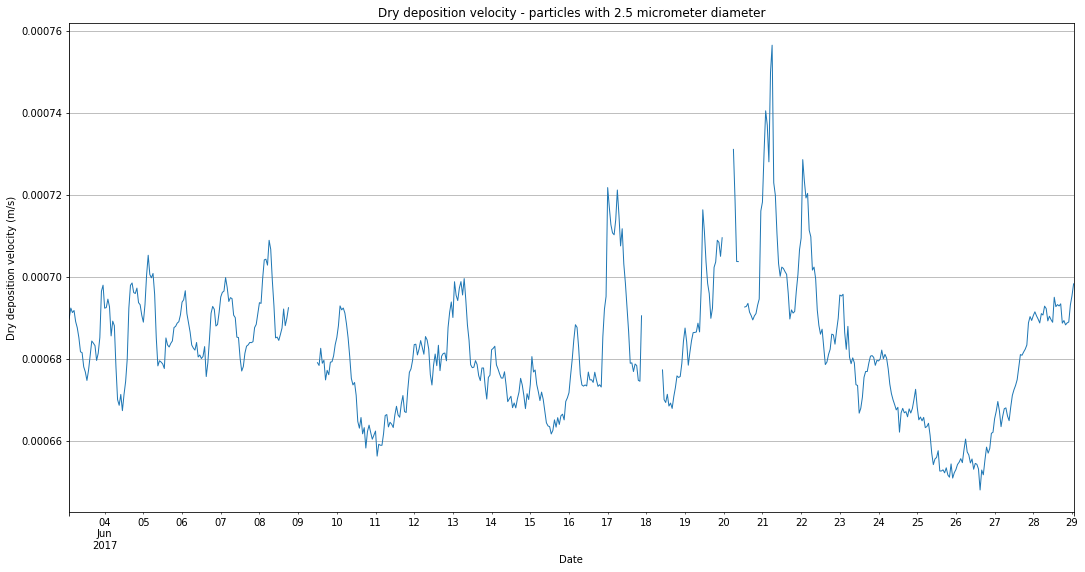

In [156]:
# Plot of the time series of Dry deposition velocity of particles with 2.5 micrometer diameter:

fig7 = data3['vd_25'].plot(linewidth=1,title ='Dry deposition velocity - particles with 2.5 micrometer diameter');
fig7.set_xlabel('Date')
fig7.set_ylabel('Dry deposition velocity (m/s)')
fig7.grid(True)
fig7.tick_params(axis='x', labelsize=16)


# To save the figure
plt.savefig('Fig7 - Dry deposition velocity of Particles diameter of 255 micrometers @ '+ name)

In [157]:
# Compute the deposition velocities for the defined "bins":

# Testing the bin edges
data3['vg_380'] = vg(0.380,data3['T'],data3['viscair'])
data3['vg_460'] = vg(0.460,data3['T'],data3['viscair'])
data3['vg_540'] = vg(0.540,data3['T'],data3['viscair'])


data3['vg_660'] = vg(0.660,data3['T'],data3['viscair'])
data3['vg_780'] = vg(0.780,data3['T'],data3['viscair'])

data3['vg_890'] = vg(0.890,data3['T'],data3['viscair'])
data3['vg_1000'] = vg(1.000,data3['T'],data3['viscair'])

data3['vg_1150'] = vg(1.150,data3['T'],data3['viscair'])
data3['vg_1300'] = vg(1.300,data3['T'],data3['viscair'])

data3['vg_1450'] = vg(1.450,data3['T'],data3['viscair'])
data3['vg_1600'] = vg(1.600,data3['T'],data3['viscair'])

data3['vg_1850'] = vg(1.850,data3['T'],data3['viscair'])
data3['vg_2100'] = vg(2.100,data3['T'],data3['viscair'])

data3['vg_2550'] = vg(2.550,data3['T'],data3['viscair'])
data3['vg_3000'] = vg(3.000,data3['T'],data3['viscair'])

data3['vg_3500'] = vg(3.5,data3['T'],data3['viscair'])
data3['vg_4000'] = vg(4.000,data3['T'],data3['viscair'])

data3['vg_4500'] = vg(4.5,data3['T'],data3['viscair'])
data3['vg_5000'] = vg(5.000,data3['T'],data3['viscair'])

data3['vg_5750'] = vg(5.75,data3['T'],data3['viscair'])
data3['vg_6500'] = vg(6.500,data3['T'],data3['viscair'])

data3['vg_7250'] = vg(7.25,data3['T'],data3['viscair'])
data3['vg_8000'] = vg(8.000,data3['T'],data3['viscair'])

data3['vg_9000'] = vg(9,data3['T'],data3['viscair'])
data3['vg_10000'] = vg(10.000,data3['T'],data3['viscair'])

data3['vg_11000'] = vg(11,data3['T'],data3['viscair'])
data3['vg_12000'] = vg(12.000,data3['T'],data3['viscair'])

data3['vg_13000'] = vg(13,data3['T'],data3['viscair'])
data3['vg_14000'] = vg(14.000,data3['T'],data3['viscair'])

data3['vg_15000'] = vg(15,data3['T'],data3['viscair'])
data3['vg_16000'] = vg(16.000,data3['T'],data3['viscair'])

data3['vg_16500'] = vg(16.5,data3['T'],data3['viscair'])
data3['vg_17000'] = vg(17.000,data3['T'],data3['viscair'])

data3['vd_460'] = vd(data3['vg_460'],data3['X_parameter'])
data3['vd_660'] = vd(data3['vg_660'],data3['X_parameter'])
data3['vd_890'] = vd(data3['vg_890'],data3['X_parameter'])
data3['vd_1150'] = vd(data3['vg_1150'],data3['X_parameter'])
data3['vd_1450'] = vd(data3['vg_1450'],data3['X_parameter'])
data3['vd_1850'] = vd(data3['vg_1850'],data3['X_parameter'])
data3['vd_2550'] = vd(data3['vg_2550'],data3['X_parameter'])
data3['vd_3500'] = vd(data3['vg_3500'],data3['X_parameter'])
data3['vd_4500'] = vd(data3['vg_4500'],data3['X_parameter'])
data3['vd_5750'] = vd(data3['vg_5750'],data3['X_parameter'])
data3['vd_7250'] = vd(data3['vg_7250'],data3['X_parameter'])
data3['vd_9000'] = vd(data3['vg_9000'],data3['X_parameter'])
data3['vd_11000'] = vd(data3['vg_11000'],data3['X_parameter'])
data3['vd_13000'] = vd(data3['vg_13000'],data3['X_parameter'])
data3['vd_15000'] = vd(data3['vg_15000'],data3['X_parameter'])
data3['vd_16500'] = vd(data3['vg_16500'],data3['X_parameter'])

# Calculating vd for bin edges:
data3['vd_380'] = vd(data3['vg_380'],data3['X_parameter'])
data3['vd_540'] = vd(data3['vg_540'],data3['X_parameter'])
data3['vd_780'] = vd(data3['vg_780'],data3['X_parameter'])
data3['vd_1000'] = vd(data3['vg_1000'],data3['X_parameter'])
data3['vd_1300'] = vd(data3['vg_1300'],data3['X_parameter'])
data3['vd_1600'] = vd(data3['vg_1600'],data3['X_parameter'])
data3['vd_2100'] = vd(data3['vg_2100'],data3['X_parameter'])
data3['vd_3000'] = vd(data3['vg_3000'],data3['X_parameter'])
data3['vd_4000'] = vd(data3['vg_4000'],data3['X_parameter'])
data3['vd_5000'] = vd(data3['vg_5000'],data3['X_parameter'])
data3['vd_6500'] = vd(data3['vg_6500'],data3['X_parameter'])
data3['vd_8000'] = vd(data3['vg_8000'],data3['X_parameter'])
data3['vd_10000'] = vd(data3['vg_10000'],data3['X_parameter'])
data3['vd_12000'] = vd(data3['vg_12000'],data3['X_parameter'])
data3['vd_14000'] = vd(data3['vg_14000'],data3['X_parameter'])
data3['vd_16000'] = vd(data3['vg_16000'],data3['X_parameter'])
data3['vd_17000'] = vd(data3['vg_17000'],data3['X_parameter'])


data3['vd_0.38-0.54']=data3['vd_460']
data3['vd_0.54-1']=(data3['vd_660']+data3['vd_890'])/2
data3['vd_1-2.1']=(data3['vd_1150']+data3['vd_1450']+data3['vd_1850'])/3
data3['vd_2.1-5']=(data3['vd_2550']+data3['vd_3500']+data3['vd_4500'])/3
data3['vd_5-10']=(data3['vd_5750']+data3['vd_7250']+data3['vd_9000'])/3
data3['vd_>10']=(data3['vd_11000']+data3['vd_13000']+data3['vd_15000']+data3['vd_16500'])/4

data3

,T,RH,WS,WD,Year,Month,Day,Hour,ustar,viscair,...,vd_12000,vd_14000,vd_16000,vd_17000,vd_0.38-0.54,vd_0.54-1,vd_1-2.1,vd_2.1-5,vd_5-10,vd_>10
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-03 02:00:00,-3.635000,74.600000,6.240000,141.033333,2017,6,3,2,0.182182,0.000013,...,0.045614,0.092426,0.191059,0.277645,0.000030,0.000079,0.000245,0.001541,0.009532,0.114878
2017-06-03 03:00:00,-4.171667,73.668333,6.263333,138.950000,2017,6,3,3,0.182851,0.000013,...,0.045772,0.092743,0.191705,0.278577,0.000031,0.000079,0.000246,0.001547,0.009566,0.115269
2017-06-03 04:00:00,-4.255000,71.785000,6.560000,138.050000,2017,6,3,4,0.191494,0.000013,...,0.043601,0.086790,0.175764,0.252552,0.000031,0.000079,0.000246,0.001539,0.009360,0.106513
2017-06-03 05:00:00,-4.631667,71.085000,6.836667,134.300000,2017,6,3,5,0.199793,0.000013,...,0.041947,0.082264,0.163765,0.233099,0.000031,0.000079,0.000246,0.001536,0.009211,0.099914
2017-06-03 06:00:00,-4.343333,68.985000,7.131667,138.650000,2017,6,3,6,0.208895,0.000013,...,0.039987,0.077131,0.150636,0.212168,0.000031,0.000079,0.000246,0.001526,0.009004,0.092620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 21:00:00,1.340000,84.135000,3.091667,137.316667,2017,6,28,21,0.106945,0.000013,...,0.090225,0.236661,0.658942,1.128004,0.000030,0.000077,0.000240,0.001613,0.012808,0.363445
2017-06-28 22:00:00,1.051667,84.581667,3.213333,137.783333,2017,6,28,22,0.109300,0.000013,...,0.087215,0.225827,0.619467,1.051764,0.000030,0.000077,0.000241,0.001609,0.012621,0.342770
2017-06-28 23:00:00,0.503333,84.873333,3.060000,133.583333,2017,6,28,23,0.106339,0.000013,...,0.092582,0.244634,0.686939,1.181424,0.000030,0.000077,0.000242,0.001625,0.013001,0.378215


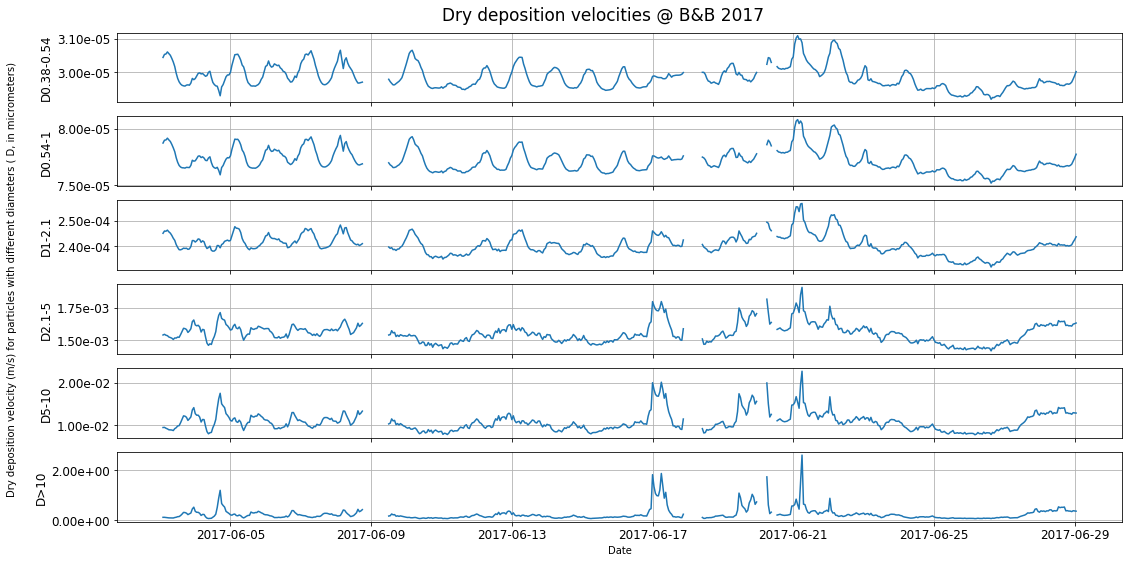

In [158]:
fig8, (ax6, ax7, ax8, ax9, ax10, ax11) = plt.subplots(6, sharex=True)


fig8.text(0.04, 0.5, 'Dry deposition velocity (m/s) for particles with different diameters ( D, in micrometers)', va='center', rotation='vertical')

fig8.suptitle('Dry deposition velocities @ ' + name, y=0.92,fontsize=17)

import matplotlib.ticker as mtick

ax6.plot(data3['vd_0.38-0.54'])
ax6.set_ylabel('D0.38-0.54', fontsize=12)
ax6.tick_params(axis='x', labelsize=12 )
ax6.tick_params(axis='y', labelsize=12 )
ax6.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax6.grid(True)

ax7.plot(data3['vd_0.54-1'])
ax7.set_ylabel('D0.54-1', fontsize=12)
ax7.tick_params(axis='x', labelsize=12 )
ax7.tick_params(axis='y', labelsize=12 )
ax7.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax7.grid(True)

ax8.plot(data3['vd_1-2.1'])
ax8.set_ylabel('D1-2.1', fontsize=12)
ax8.tick_params(axis='x', labelsize=12 )
ax8.tick_params(axis='y', labelsize=12 )
ax8.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax8.grid(True)

ax9.plot(data3['vd_2.1-5'])
ax9.set_ylabel('D2.1-5', fontsize=12)
ax9.tick_params(axis='x', labelsize=12 )
ax9.tick_params(axis='y', labelsize=12 )
ax9.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax9.grid(True)

ax10.plot(data3['vd_5-10'])
ax10.set_ylabel('D5-10', fontsize=12)
ax10.tick_params(axis='x', labelsize=12 )
ax10.tick_params(axis='y', labelsize=12 )
ax10.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax10.grid(True)

ax11.plot(data3['vd_>10'])
ax11.set_ylabel('D>10', fontsize=12)
ax11.tick_params(axis='x', labelsize=12 )
ax11.tick_params(axis='y', labelsize=12 )
ax11.set_xlabel('Date')
ax11.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax11.grid(True)

# To save the figure
plt.savefig('Fig8 - Dry deposition velocities @ ' + name)

In [159]:
# Check the descriptive statistics and save a table in Excel

descr = data3.describe()

descr.to_csv('Descriptive_Statistics_in_Python.csv', index=True)

In [160]:
descr

,T,RH,WS,WD,Year,Month,Day,Hour,ustar,viscair,...,vd_12000,vd_14000,vd_16000,vd_17000,vd_0.38-0.54,vd_0.54-1,vd_1-2.1,vd_2.1-5,vd_5-10,vd_>10
count,607.000000,607.000000,586.000000,586.000000,624.0,624.0,624.000000,624.00000,586.000000,6.070000e+02,...,586.000000,586.000000,586.000000,586.000000,5.860000e+02,5.860000e+02,586.000000,586.000000,586.000000,586.000000
mean,-0.004607,76.766345,4.931886,142.098732,2017.0,6.0,15.583333,11.50000,0.151396,1.326008e-05,...,0.065176,0.159178,0.424069,0.722022,2.983890e-05,7.716444e-05,0.000241,0.001555,0.010840,0.237826
std,2.078894,5.943354,1.651696,36.834358,0.0,0.0,7.511112,6.92774,0.041220,1.799600e-07,...,0.031932,0.117499,0.465985,0.965849,3.531157e-07,9.921910e-07,0.000004,0.000074,0.002176,0.243619
min,-7.031667,62.715000,0.683333,18.066667,2017.0,6.0,3.000000,0.00000,0.069465,1.265549e-05,...,0.030920,0.055181,0.098520,0.132082,2.917498e-05,7.518863e-05,0.000232,0.001419,0.007840,0.063023
25%,-1.398333,72.190833,3.750417,129.083333,2017.0,6.0,9.000000,5.75000,0.120228,1.313891e-05,...,0.044653,0.090254,0.187027,0.272472,2.958294e-05,7.645071e-05,0.000238,0.001503,0.009342,0.112261
50%,0.576667,76.060000,4.846667,139.658333,2017.0,6.0,16.000000,11.50000,0.145217,1.331006e-05,...,0.057810,0.128856,0.297031,0.457658,2.974819e-05,7.696245e-05,0.000240,0.001547,0.010497,0.172236
75%,1.540000,80.935833,6.073333,149.970833,2017.0,6.0,22.000000,17.25000,0.177454,1.339385e-05,...,0.076137,0.187841,0.487387,0.802576,3.005000e-05,7.769457e-05,0.000243,0.001592,0.011879,0.273195
max,3.896667,92.113333,8.820000,342.466667,2017.0,6.0,29.000000,23.00000,0.266007,1.359969e-05,...,0.286656,1.122821,4.965626,10.963660,3.109536e-05,8.080648e-05,0.000257,0.001908,0.022672,2.595500


In [161]:
# Writing and saving file with all data

# This final csv file will have all the data produced:

selection = data3

output_selection = 'DDV Calculation_final.csv'

# Save dataframe to csv
selection.to_csv(output_selection, sep=',', index = True)

In [162]:
DDV = data3[["T","RH","WS","WD", "Year","Month","Day","Hour","vd_0.38-0.54","vd_0.54-1","vd_1-2.1","vd_2.1-5","vd_5-10","vd_>10"]]

In [163]:
DDV

,T,RH,WS,WD,Year,Month,Day,Hour,vd_0.38-0.54,vd_0.54-1,vd_1-2.1,vd_2.1-5,vd_5-10,vd_>10
Date,,,,,,,,,,,,,,
2017-06-03 02:00:00,-3.635000,74.600000,6.240000,141.033333,2017,6,3,2,0.000030,0.000079,0.000245,0.001541,0.009532,0.114878
2017-06-03 03:00:00,-4.171667,73.668333,6.263333,138.950000,2017,6,3,3,0.000031,0.000079,0.000246,0.001547,0.009566,0.115269
2017-06-03 04:00:00,-4.255000,71.785000,6.560000,138.050000,2017,6,3,4,0.000031,0.000079,0.000246,0.001539,0.009360,0.106513
2017-06-03 05:00:00,-4.631667,71.085000,6.836667,134.300000,2017,6,3,5,0.000031,0.000079,0.000246,0.001536,0.009211,0.099914
2017-06-03 06:00:00,-4.343333,68.985000,7.131667,138.650000,2017,6,3,6,0.000031,0.000079,0.000246,0.001526,0.009004,0.092620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 21:00:00,1.340000,84.135000,3.091667,137.316667,2017,6,28,21,0.000030,0.000077,0.000240,0.001613,0.012808,0.363445
2017-06-28 22:00:00,1.051667,84.581667,3.213333,137.783333,2017,6,28,22,0.000030,0.000077,0.000241,0.001609,0.012621,0.342770
2017-06-28 23:00:00,0.503333,84.873333,3.060000,133.583333,2017,6,28,23,0.000030,0.000077,0.000242,0.001625,0.013001,0.378215


In [164]:
# This final DDV csv file will have only DDV values for integrated bins:

selection2 = DDV

output_selection = 'DDV_final.csv'

# Save dataframe to csv
selection2.to_csv(output_selection, sep=',', index = True)